In [ ]:
Michaela Carroll Section: B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [35]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
titanic_df = pd.read_csv('PS05/titanic.csv')
print(titanic_df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [57]:
print(titanic_df['Sex'].value_counts())

Sex
1    577
0    314
Name: count, dtype: int64


In [56]:
print(titanic_df[['Sex', 'Survived']].describe())

              Sex    Survived
count  891.000000  891.000000
mean     0.647587    0.383838
std      0.477990    0.486592
min      0.000000    0.000000
25%      0.000000    0.000000
50%      1.000000    0.000000
75%      1.000000    1.000000
max      1.000000    1.000000


# Your written answer:
 - 891 passengers
 - 64.8%
 - 38.4%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [90]:
female_survival = titanic_df[titanic_df['Sex'] == 0]['Survived'].mean()*100
male_survival = titanic_df[titanic_df['Sex'] == 1]['Survived'].mean()*100

print(f"Female survival rate: {female_survival:.1f}%")
print(f"Male survival rate: {male_survival:.1f}%")

Female survival rate: 74.2%
Male survival rate: 18.9%


#### Your written answer:

 - 74.2%
 - 18.9%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [92]:
total_passengers = len(titanic_df)
class_stats['Ticket_Percentage'] = (class_stats['PassengerId'] / total_passengers * 100).round(1)
class_stats['Survival_Percentage'] = (class_stats['Survived'] * 100).round(1)

print(class_stats)

        PassengerId  Survived  Ticket_Percentage  Survival_Percentage
Pclass                                                               
1               216     0.630               24.2                 63.0
2               184     0.473               20.7                 47.3
3               491     0.242               55.1                 24.2


Your written answer:

 - Class 1 
    - % tickets: 24.2%
    - % survivorship: 63%
- Class 2 
    - % tickets: 20.7%
    - % survivorship: 47.3%
- Class 3
    - % tickets: 55.1%
    - % survivorship: 24.2%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
Unlucky
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


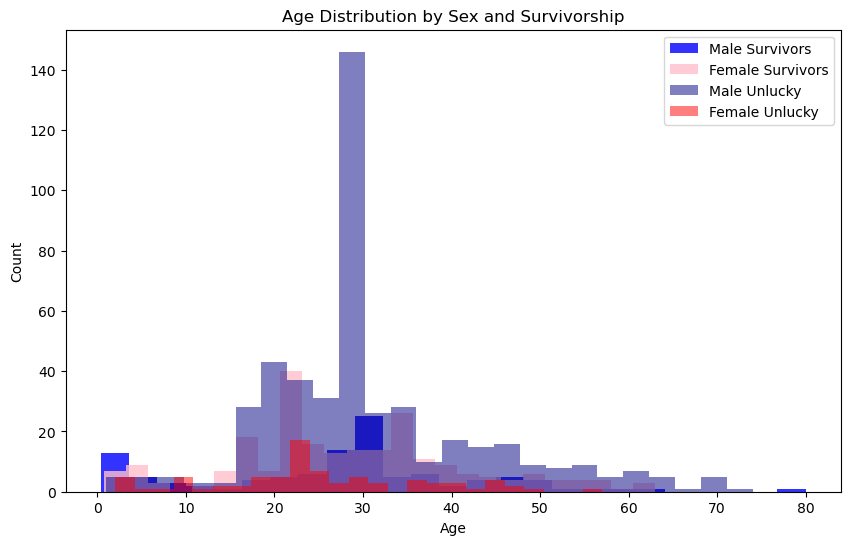

In [88]:
print("Survivors")
print(survivors.head())

print("Unlucky")
print(non_survivors.head())

plt.figure(figsize=(10, 6))

#survivors
plt.hist(survivors[survivors['Sex'] == 1]['Age'], 
         alpha=0.8, 
         label='Male Survivors', 
         color='blue', 
         bins=25)
plt.hist(survivors[survivors['Sex'] == 0]['Age'], 
         alpha=0.8, 
         label='Female Survivors', 
         color='pink', 
         bins=25)

#non-survivors
plt.hist(non_survivors[non_survivors['Sex'] == 1]['Age'], 
         alpha=0.5, label='Male Unlucky', 
         color='navy', 
         bins=25)
plt.hist(non_survivors[non_survivors['Sex'] == 0]['Age'], 
         alpha=0.5, 
         label='Female Unlucky', 
         color='red', 
         bins=25)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [37]:
label = ['Survived']
features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family_Size']
#We want to use all of the informative data we can get

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(titanic_df[features], 
                                                   titanic_df[label], 
                                                   test_size=0.2,)

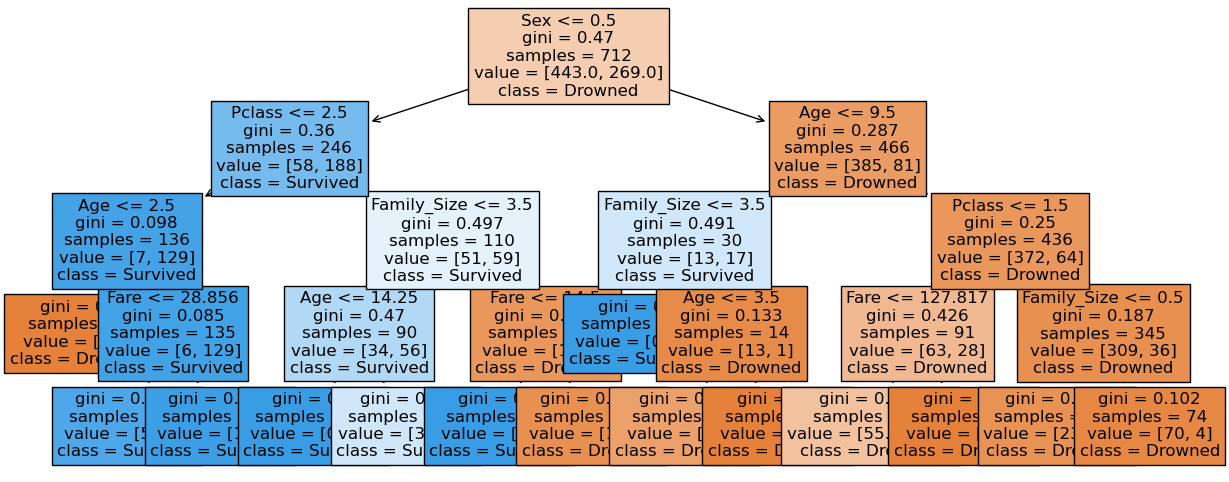

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train, Y_train)

fig, ax = plt.subplots(1,1, figsize = (15,6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned','Survived'],
          filled = True, fontsize = 12)

plt.show()

#tree_clf.__dict__

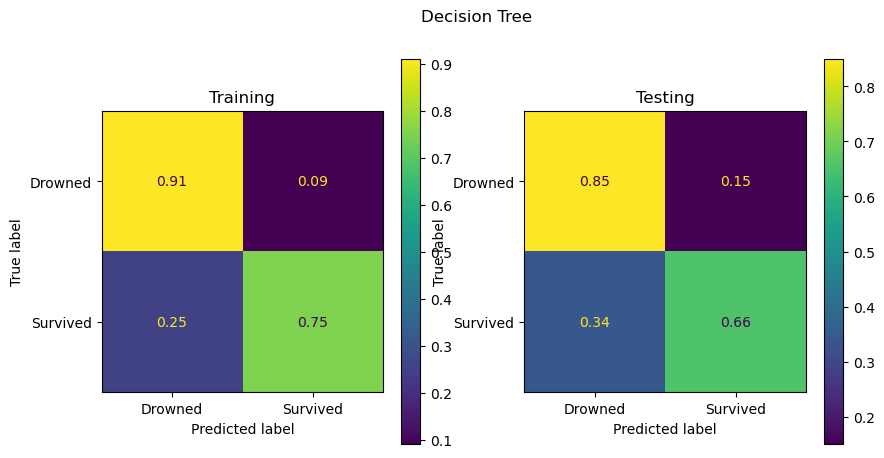

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(Y_train, y_tree_train, 
                                     normalize ='true',
                                     display_labels=['Drowned', 'Survived'],
                                     ax=ax[0])

ConfusionMatrixDisplay.from_predictions(Y_test, y_tree_test, 
                                     normalize ='true',
                                     display_labels=['Drowned', 'Survived'],
                                     ax=ax[1])

ax[0].set_title('Training')
ax[1].set_title('Testing')
fig.suptitle('Decision Tree')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = Y_train.values.ravel() 
ys_test = Y_test.values.ravel()    


knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(Xs_train, ys_train)    

KNeighborsClassifier(n_neighbors=15)

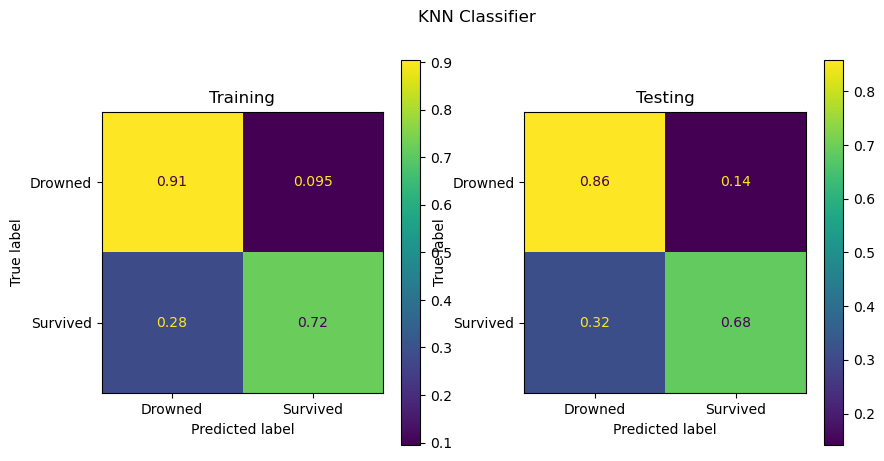

In [47]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(Y_train, y_knn_train,
                                      normalize='true',
                                      display_labels=['Drowned', 'Survived'],
                                      ax=ax[0])

ConfusionMatrixDisplay.from_predictions(Y_test, y_knn_test,  
                                      normalize='true',
                                      display_labels=['Drowned', 'Survived'],
                                      ax=ax[1])

ax[0].set_title('Training')
ax[1].set_title('Testing')
fig.suptitle('KNN Classifier')
plt.show()

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - Both models perform slightly better on training data than test data. The Decision Tree has a bigger gap between training and test performance. 


Which models did you fit and which worked better?
 
 - I fit two models (Decision Tree Classifier and K Nearest Neighbors). Based on the two decision matrixes, KNN worked better. 